# **The Machine Model here works on finding the bearing health.**


**Attributes** :
> FE(Fan End)

> DE(Drive End)

> RPM

> Sampling Frequency











# **Pre-Processing of the Model**

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random



In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Mini_project


/content/drive/.shortcut-targets-by-id/1a2_PLX0AU6O86NO4TMQ_GU_RnkTuW77E/Mini_project


In [ ]:
#Reading the different datasets
import pandas as pd

df1 = pd.read_csv('H0_L0_RPM1796_SF12.csv', usecols= ['FE','DE'])
df1['RPM'] = 1796
df1['Sampling_frequency'] = 12000
df1['Healthy/Faulty'] = 'Healthy'

df2 = pd.read_csv('H0_L1_RPM1772_SF12.csv', usecols= ['FE','DE'])
df2['RPM'] = 1772
df2['Sampling_frequency'] = 12000
df2['Healthy/Faulty'] = 'Healthy'

df3 = pd.read_csv('H0_L2_RPM1750_SF12.csv', usecols= ['FE','DE'])
df3['RPM'] = 1750
df3['Sampling_frequency'] = 12000
df3['Healthy/Faulty'] = 'Healthy'

df4= pd.read_csv('H0_L3_RPM1725_SF12.csv', usecols= ['FE','DE'])
df4['RPM'] = 1726
df4['Sampling_frequency'] = 12000
df4['Healthy/Faulty'] = 'Healthy'

df5 = pd.read_csv('F1_L0_RPM1796_SF12_Ball.csv', usecols= ['FE','DE'])
df5['RPM'] = 1796
df5['Sampling_frequency'] = 12000
df5['Healthy/Faulty'] = 'Fault-Ball'

df6 = pd.read_csv('F1_L0_RPM1796_SF12_Outer.csv', usecols= ['FE','DE'])
df6['RPM'] = 1796
df6['Sampling_frequency'] = 12000
df6['Healthy/Faulty'] = 'Fault-Outer_rays'

df7 = pd.read_csv('F1_L0_RPM1797_SF12_Inner.csv', usecols= ['FE','DE'])
df7['RPM'] = 1797
df7['Sampling_frequency'] = 12000
df7['Healthy/Faulty'] = 'Fault-Inner_rays'

df8= pd.read_csv('F1_L1_RPM1772_SF12_Ball.csv', usecols= ['FE','DE'])
df8['RPM'] = 1772
df8['Sampling_frequency'] = 12000
df8['Healthy/Faulty'] = 'Fault-Ball'

df9= pd.read_csv('F1_L1_RPM1772_SF12_Inner.csv', usecols= ['FE','DE'])
df9['RPM'] = 1772
df9['Sampling_frequency'] = 12000
df9['Healthy/Faulty'] = 'Fault-Inner_rays'


df10= pd.read_csv('F1_L1_RPM1773_SF12_Outer.csv', usecols= ['FE','DE'])
df10['RPM'] = 1773
df10['Sampling_frequency'] = 12000
df10['Healthy/Faulty'] = 'Fault-Outer_rays'


df11= pd.read_csv('F1_L2_RPM1748_SF12_Ball.csv', usecols= ['FE','DE'])
df11['RPM'] = 1748
df11['Sampling_frequency'] = 12000
df11['Healthy/Faulty'] = 'Fault-Ball'


df12= pd.read_csv('F1_L2_RPM1748_SF12_Inner.csv', usecols= ['FE','DE'])
df12['RPM'] = 1748
df12['Sampling_frequency'] = 12000
df12['Healthy/Faulty'] = 'Fault-Inner_rays'

df13= pd.read_csv('F1_L2_RPM1750_SF12_Outer.csv', usecols= ['FE','DE'])
df13['RPM'] = 1750
df13['Sampling_frequency'] = 12000
df13['Healthy/Faulty'] = 'Fault-Outer_rays'

df14= pd.read_csv('F1_L3_RPM1721_SF12_Inner.csv', usecols= ['FE','DE'])
df14['RPM'] = 1721
df14['Sampling_frequency'] = 12000
df14['Healthy/Faulty'] = 'Fault-Inner_rays'

df15= pd.read_csv('F1_L3_RPM1722_SF12_Ball.csv', usecols= ['FE','DE'])
df15['RPM'] = 1722
df15['Sampling_frequency'] = 12000
df15['Healthy/Faulty'] = 'Fault-Ball'

df16= pd.read_csv('F1_L3_RPM1725_SF12_Outer.csv', usecols= ['FE','DE'])
df16['RPM'] = 1725
df16['Sampling_frequency'] = 12000
df16['Healthy/Faulty'] = 'Fault-Outer_rays'


df17= pd.read_csv('F1_L0_RPM1796_SF48_Ball.csv', usecols= ['FE','DE'])
df17['RPM'] = 1796
df17['Sampling_frequency'] = 48000
df17['Healthy/Faulty'] = 'Fault-Ball'

df18= pd.read_csv('F1_L0_RPM1796_SF48_Inner.csv', usecols= ['FE','DE'])
df18['RPM'] = 1796
df18['Sampling_frequency'] = 48000
df18['Healthy/Faulty'] = 'Fault-Inner_rays'

df19= pd.read_csv('F1_L0_RPM1796_SF48_Outer.csv', usecols= ['FE','DE'])
df19['RPM'] = 1796
df19['Sampling_frequency'] = 48000
df19['Healthy/Faulty'] = 'Fault-Outer_rays'

df20= pd.read_csv('F1_L1_RPM1772_SF48_Ball.csv', usecols= ['FE','DE'])
df20['RPM'] = 1772
df20['Sampling_frequency'] = 48000
df20['Healthy/Faulty'] = 'Fault-Ball'

df21= pd.read_csv('F1_L1_RPM1772_SF48_Inner.csv', usecols= ['FE','DE'])
df21['RPM'] = 1772
df21['Sampling_frequency'] = 48000
df21['Healthy/Faulty'] = 'Fault-Inner_rays'

df22= pd.read_csv('F1_L1_RPM1774_SF48_Outer.csv', usecols= ['FE','DE'])
df22['RPM'] = 1774
df22['Sampling_frequency'] = 48000
df22['Healthy/Faulty'] = 'Fault-Outer_rays'

df23= pd.read_csv('F1_L2_RPM1747_SF48_Ball.csv', usecols= ['FE','DE'])
df23['RPM'] = 1747
df23['Sampling_frequency'] = 48000
df23['Healthy/Faulty'] = 'Fault-Ball'

df24= pd.read_csv('F1_L3_RPM1721_SF48_Inner.csv', usecols= ['FE','DE'])
df24['RPM'] = 1721
df24['Sampling_frequency'] = 48000
df24['Healthy/Faulty'] = 'Fault-Inner_rays'

df25= pd.read_csv('F1_L2_RPM1748_SF48_Inner.csv', usecols= ['FE','DE'])
df25['RPM'] = 1748
df25['Sampling_frequency'] = 48000
df25['Healthy/Faulty'] = 'Fault-Inner_rays'

df26= pd.read_csv('F1_L2_RPM1750_SF48_Outer.csv', usecols= ['FE','DE'])
df26['RPM'] = 1750
df26['Sampling_frequency'] = 48000
df26['Healthy/Faulty'] = 'Fault-Outer_rays'

df27= pd.read_csv('F1_L3_RPM1721_SF48_Ball.csv', usecols= ['FE','DE'])
df27['RPM'] = 1721
df27['Sampling_frequency'] = 48000
df27['Healthy/Faulty'] = 'Fault-Ball'

df28= pd.read_csv('F1_L3_RPM1725_SF48_Outer.csv', usecols= ['FE','DE'])
df28['RPM'] = 1725
df28['Sampling_frequency'] = 48000
df28['Healthy/Faulty'] = 'Fault-Outer_rays'


df_final1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28] , axis=0)
# display(df_final)

In [ ]:
df_final1.shape

(8276377, 5)

In [ ]:
df_final1.head()

,FE,DE,RPM,Sampling_frequency,Healthy/Faulty
0,0.145667,0.053197,1796,12000,Healthy
1,0.097796,0.088662,1796,12000,Healthy
2,0.054856,0.099718,1796,12000,Healthy
3,0.036982,0.058621,1796,12000,Healthy
4,0.054445,-0.004590,1796,12000,Healthy


In [ ]:
#Handling missing data
df_final1.isnull().sum()


FE                    0
DE                    0
RPM                   0
Sampling_frequency    0
Healthy/Faulty        0
dtype: int64

In [ ]:
#Dealing with Missing values
df_final=df_final1.dropna()

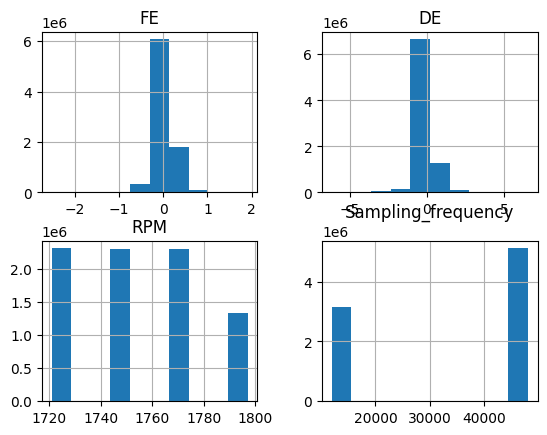

In [ ]:
#Univariate plot
df_final.hist()
plt.show()

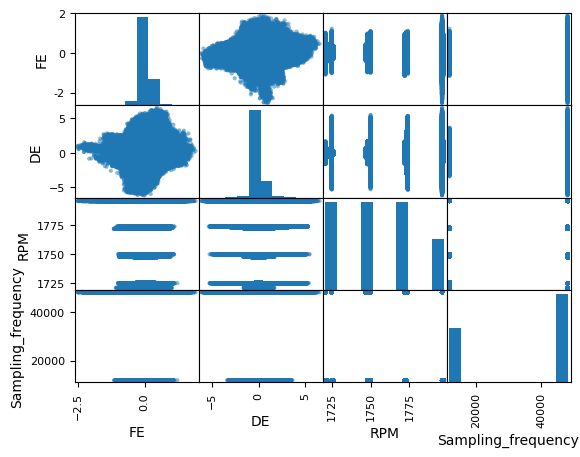

In [ ]:
#Bi-variate analysis
# scatter plot matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df_final)
plt.show()

In [ ]:
#Labeling the data
array = df_final.values
inputs = array[:, 0:4]
output = array[:, 4]

In [ ]:
#Normalising the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
inputs_normalized = scaler.fit_transform(inputs)

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 0)

# **Model Evaluation**

In [ ]:
#Model-KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#Pridicting the model
y_pred = knn.predict(X_test)
print(y_pred)

['Fault-Ball' 'Fault-Inner_rays' 'Healthy' ... 'Fault-Inner_rays'
 'Fault-Outer_rays' 'Fault-Inner_rays']


In [ ]:

df = pd.DataFrame(y_pred, columns = ['Type of defect'])
df['Type of defect'].value_counts()

Fault-Ball          711915
Fault-Outer_rays    623715
Fault-Inner_rays    582566
Healthy             564718
Name: Type of defect, dtype: int64

# **Post-Processing of the Model**

In [ ]:
#Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print ("Precision : ", precision_score(y_test, y_pred, average = None))
print ("Recall : ", recall_score(y_test, y_pred, average=None))

Accuracy :  0.8383645184649972
Precision :  [0.72499245 0.82133355 0.95370642 0.87146505]
Recall :  [0.78473297 0.7290006  0.90211759 0.96598562]


In [ ]:
#f1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.75368073, 0.77241754, 0.92719496, 0.91629421])

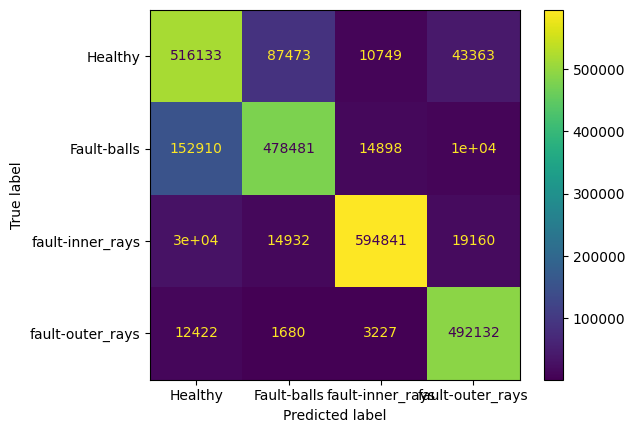

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Healthy','Fault-balls','fault-inner_rays','fault-outer_rays'])

cm_display.plot()
plt.show()

# **Testing of the Model**

In [ ]:
import pandas as pd
dft1 = pd.read_csv('test14_F1_L0_RPM1797_SF48_Ball.csv', usecols= ['FE','DE'])
dft1['RPM'] = 1797
dft1['Sampling_frequency'] = 48000
dft1['Healthy/Faulty'] = 'Fault-Ball'


In [ ]:
#Labeling the data
array = dft1.values
inputs_test = array[:, 0:4]
output_test = array[:, 4]

In [ ]:
y_pred_test = knn.predict(inputs_test)

In [ ]:
values = df.values.tolist()
count_ball=0
count_inner = 0
count_outer =0
count_healthy = 0


if values == 'Fault-Ball':
  count_ball +=1
elif values == 'Fault-Outer_rays':
  count_outer +=1
elif values == 'Fault-Inner_rays':
  count_inner +=1
else:
  count_healthy +=1

In [ ]:
if count_ball>=count_outer  and count_ball>=count_inner:
  print("The Bearing is defective and has a defect in balls")
elif count_outer>=count_ball  and count_outer>=count_inner:
  print("The Bearing is defective and has a defect in inner rays")
elif count_inner>=count_ball  and count_inner>=count_outer:
  print("The Bearing is defective and has a defect in outer rays")
else:
  print("The bearing is healthy")

The Bearing is defective and has a defect in balls
